# uSEIR data (CCAA) analyses - draft

In [98]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 12

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Sun May 24 18:05:22 2020


In [100]:
import numpy as np
import pandas as pd
import matplotlib

In [101]:
fontsize=14
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }
plt.rcParams["font.size"     ] = fontsize

def figure(size = (10, 8)):
    plt.figure(figsize = size)

In [102]:
import c19.useir            as us
import c19.kfmysir          as kf
import c19.useir_ana        as aus
import c19.cfit         as cfit

#import c19.momodata         as 

import scipy          as sp
import scipy.stats    as stats
import scipy.optimize as optimize

npa     = np.array
npdate  = np.datetime64
npdtime = np.timedelta64

## Data

### Load Data CCAA

In [103]:
dfsa = aus.dfsanidad()

Obtaining meteo data...
Andalucia 5402
Aragon 9434
Asturias 1208H
Baleares B278
Canarias C029O
Cantabria 1111
Castilla La Mancha 4121
Castilla y Leon 2422
Cataluna 0016A
Ceuta 5000C
C. Valenciana 8414A
Extremadura 3469A
Galicia 1428
Madrid 3200
Melilla 6000A
Murcia 7178I
Navarra 9263D
Pais Vasco 1024E
La Rioja 9170
-- Done
-- Done
Index(['Andalucia', 'Aragon', 'Asturias', 'Baleares', 'Canarias', 'Cantabria',
       'Castilla La Mancha', 'Castilla y Leon', 'Cataluna', 'Ceuta',
       'C. Valenciana', 'Extremadura', 'Galicia', 'Madrid', 'Melilla',
       'Murcia', 'Navarra', 'Pais Vasco', 'La Rioja'],
      dtype='object', name='CCAA')
Combining C19 and meteo data...
-- Done
Merging into a single dataframe...
-- Done
Saving the final dataframe to ../data/data_communities.csv ...
-- Done


### Load MoMo

In [104]:
dfmo = aus.dfmomo()

/Users/hernando/investigacion/bio/c19/data/momo_17_05_2020.csv


## Compare momo and covid

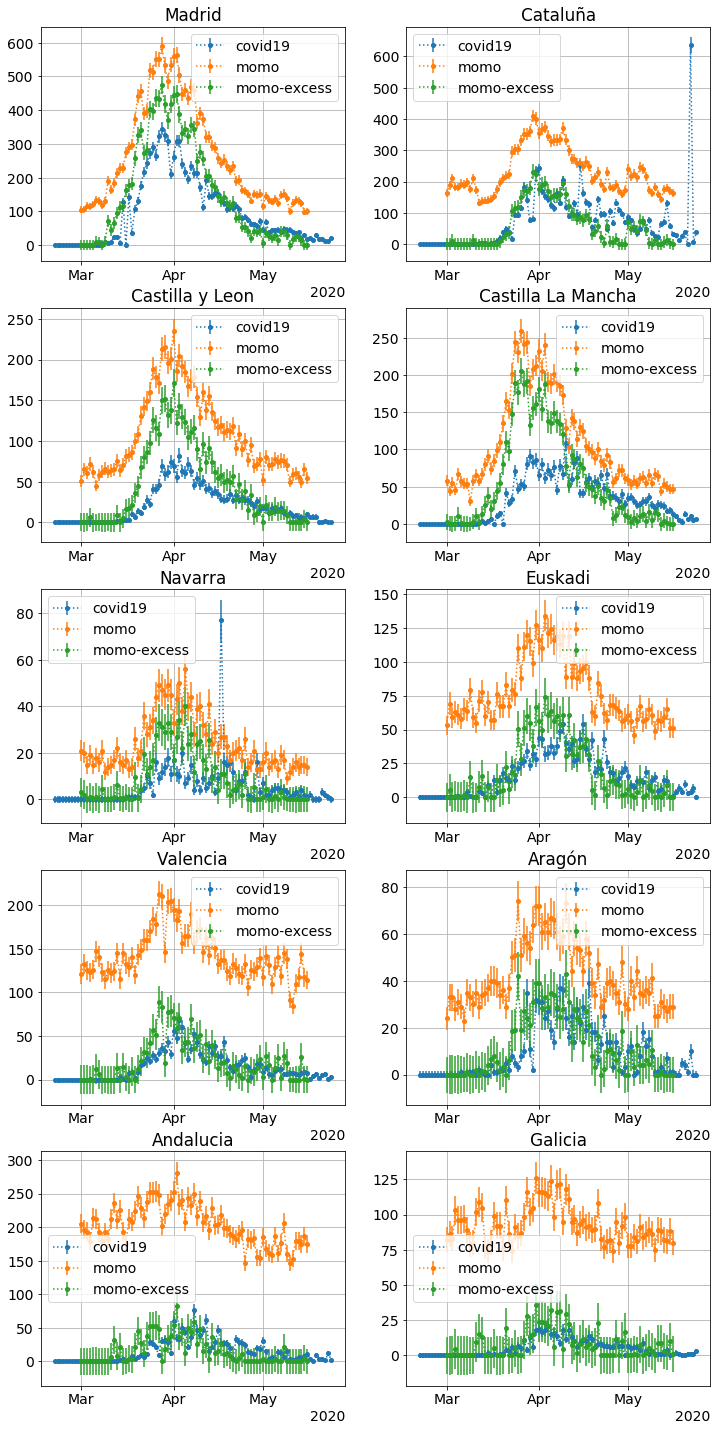

In [105]:
aus.plot_cas_momos(dfsa, dfmo);

27


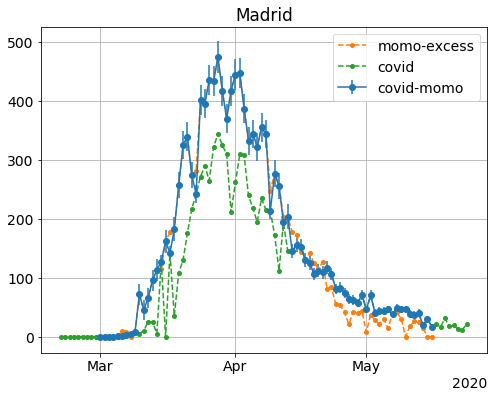

In [106]:
xdates, xdms, xudms  = aus.ca_comomo(dfsa, dfmo, 'Madrid', plot = True)
print(np.argmax(xdms))

In [107]:
xs = np.concatenate([npa(int(size) * [i]) for i, size in enumerate(xdms)])

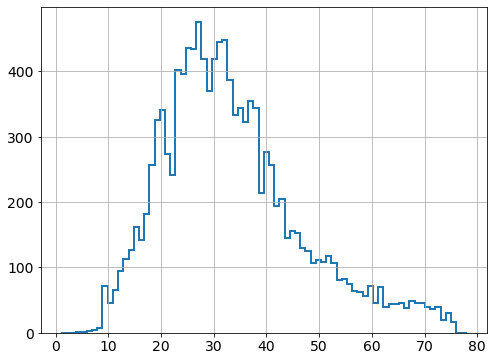

In [108]:
ndays = len(xdates)
plt.hist(xs, ndays+1, (1, ndays +1), histtype = 'step', lw = 2); plt.grid();

55


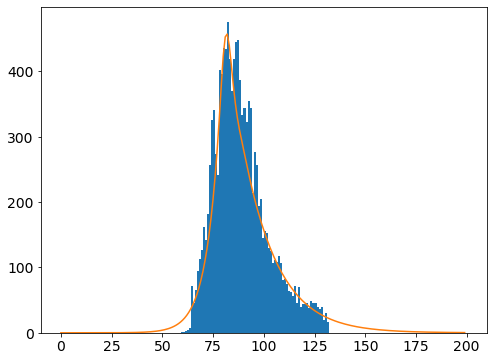

In [132]:
pars     = (3., 0.7, 3.)
parsmask = (True, True, True)
dms  = us._useirvar(pars)
ts   = np.arange(len(dms))

t0model = np.argmax(dms)
t0data  = np.argmax(xdms)
dt0     = t0model - t0data 
print(dt0)

xxs = xs + dt0

ys, xedges = np.histogram(xxs, 200, (0., 200))
xcenters   = 0.5 * (xedges[1:] + xedges[:-1]) 

plt.hist(xxs, 200, (0, 200))
plt.plot(ts, dms);

In [164]:
def useir_experiment(pars, ufun = us._useir):
    dms = ufun(pars)
    rv  = us.useir_rv(dms)
    size = np.sum(dms)
    xs = rv.rvs(size = int(size))
    return xs, dms

def mlefit0(xs, pars, parmask, ufun = us._useir):
    llfun = lambda xs, pars: us.useir0_llike(xs, pars, ufun)
    phat = cfit.mle(xs, llfun, pars, parsmask) 
    return phat

def lsqfit0(xs, pars, parmask, ufun = us._useir, nbins = 200):
    lsqfun   = lambda xs, pars: us.useir0_fun(xs, pars, ufun)
    ys, xxs = np.histogram(xs, nbins, (0, nbins))
    xxs = 0.5*(xxs[1:] + xxs[:-1])
    phat = cfit.lsq(xxs, ys, lsqfun, pars, parsmask)
    return phat
#    return times, phat_mle

In [173]:
def mlefit0(xs, pars, parmask, ufun = us._useir):
    llfun = lambda xs, pars: us.useir0_llike(xs, pars, ufun)
    phat = cfit.mle(xs, llfun, pars, parsmask) 
    return phat

def lsqfit0(xs, pars, parmask, ufun = us._useir, nbins = 200):
    lsqfun   = lambda xs, pars: us.useir0_fun(xs, pars, ufun)
    ys, xxs = np.histogram(xs, nbins, (0, nbins))
    xxs = 0.5*(xxs[1:] + xxs[:-1])
    phat = cfit.lsq(xxs, ys, lsqfun, pars, parsmask)
    return phat

In [174]:
pars     = (56, 3.0, 0.74, 3.)
parsmask = (True, True, True, True)
phat = mlefit0(xs, pars, parsmask, ufun = us._useirvar)
#sel = (ts >= 00) & (ts <= 200)
#plt.errorbar(xcenters[sel], ys[sel], yerr = np.sqrt(ys)[sel], c = 'black', 
#             ls = '', marker = 'o', ms = 4, label = 'data');
#plt.plot(ts[sel] + phat[0], us.useir0_fun(ts, phat, us._useirvar)[sel], c= 'blue', lw = 2);
print(*phat)

54.38305534918866 3.1528230271066784 0.7333100700087392 3.0384659188437677


(56, 3.0, 0.74, 3.0) (True, True, True, True)
54.38305534918866 3.1528230271066784 0.7333100700087392 3.0384659188437677


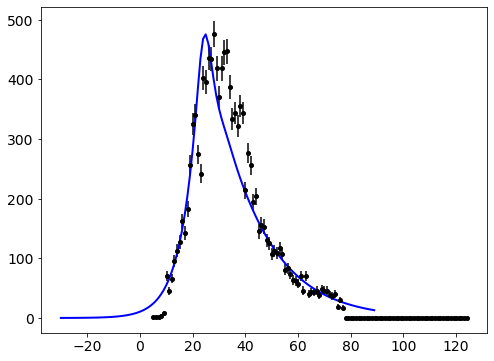

In [175]:
print(pars, parsmask)
parsp = npa(pars)
parsp[npa(parsmask, dtype = 'bool')] = phat
xt0 =  phat[0]
sel = (xcenters > int(t0) - 30) & (xcenters < int(t0) + 90)
plt.errorbar(xcenters[sel] - phat[0], ys[sel], yerr = np.sqrt(ys)[sel], c = 'black', 
             ls = '', marker = 'o', ms = 4, label = 'data');
plt.plot((ts- t0)[sel], us.useir0_fun(ts-t0, parsp, us._useirvar)[sel], c= 'blue', lw = 2);
print(*phat)

In [ ]:
pars     = (54, 3.15, 0.733, 3.04)
parsmask = (False, True, True, True)
phat2 = lsqfit0(xxs, pars, parsmask, us._useirvar)

(56, 3.0, 0.74, 3.0) (True, True, True, True)
52.41810040239227 3.8978451479322525 0.2826554643562662 6.92146761363572


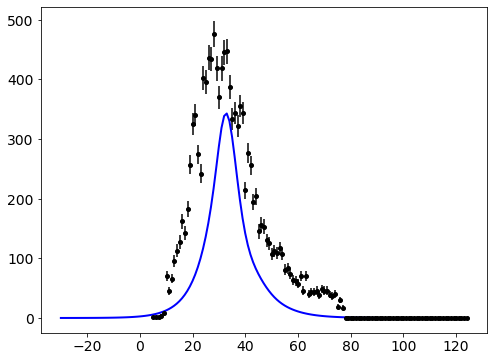

In [177]:
print(pars, parsmask)
parsp = npa(pars)
parsp[npa(parsmask, dtype = 'bool')] = phat2
xt0 =  phat2[0]
sel = (xcenters > int(t0) - 30) & (xcenters < int(t0) + 90)
plt.errorbar(xcenters[sel] - phat[0], ys[sel], yerr = np.sqrt(ys)[sel], c = 'black', 
             ls = '', marker = 'o', ms = 4, label = 'data');
plt.plot((ts- t0)[sel], us.useir0_fun(ts-t0, parsp, us._useirvar)[sel], c= 'blue', lw = 2);
print(*phat2)

In [46]:
t0model = np.argmax(dms)
t0data  = np.argmax(xdms)
dt0     = t0model - t0data 
print(dt0)

62


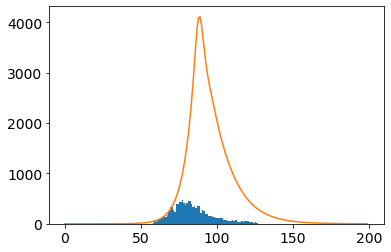

In [48]:
xxs = xs + 50

plt.hist(xxs, 200, (0, 200))
plt.plot(ts, dms);

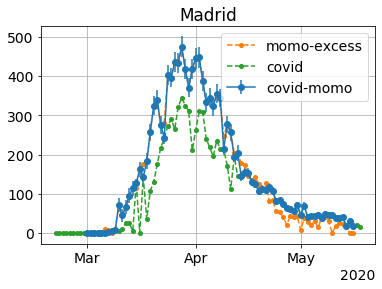

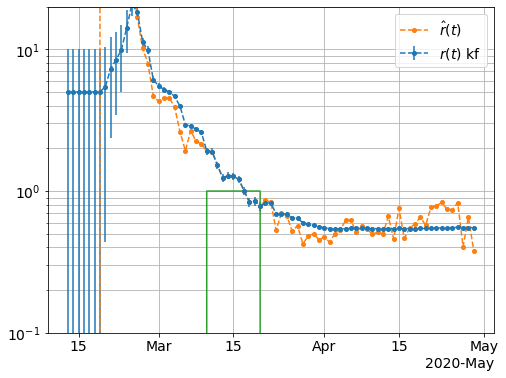

In [12]:
ti, tr, tm, td = 5, 10, 7, 5
frho           = us.fgamma
idates         = ('2020-03-10', '2020-03-20')
times          = (ti, tr, tm, td)
cc = aus.ca_kafi(dfsa, dfmo, 'Madrid', times, frho,
                 idates = ('2020-03-10', '2020-03-20'), plot = True)

### Compare Momo and Covid19

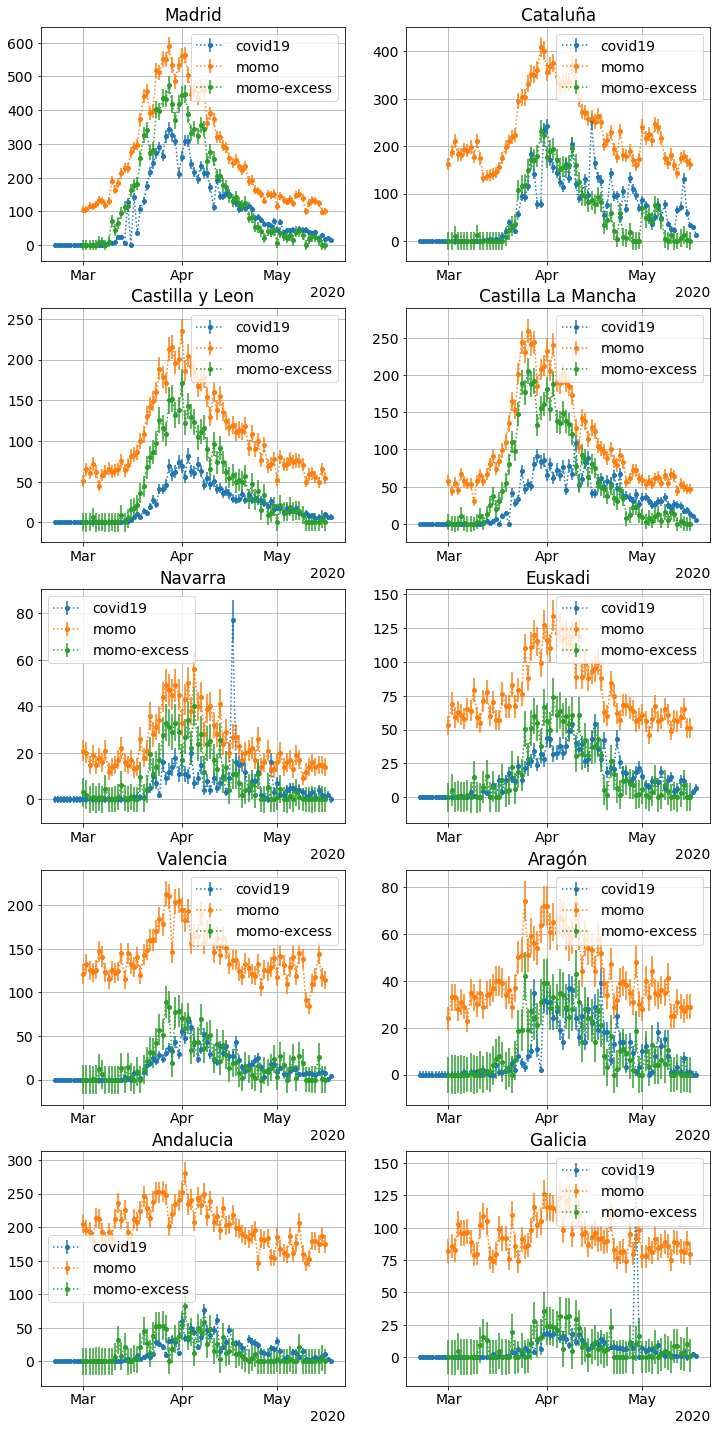

In [260]:
aus.plot_ca_momos(dfsa, dfmo);

### covid-momo: comomo

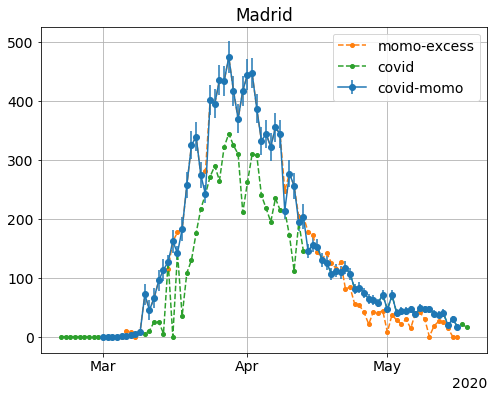

In [265]:
xdates, xdms, xudms = aus.ca_comomo(dfsa, dfmo, 'Madrid', plot = True)

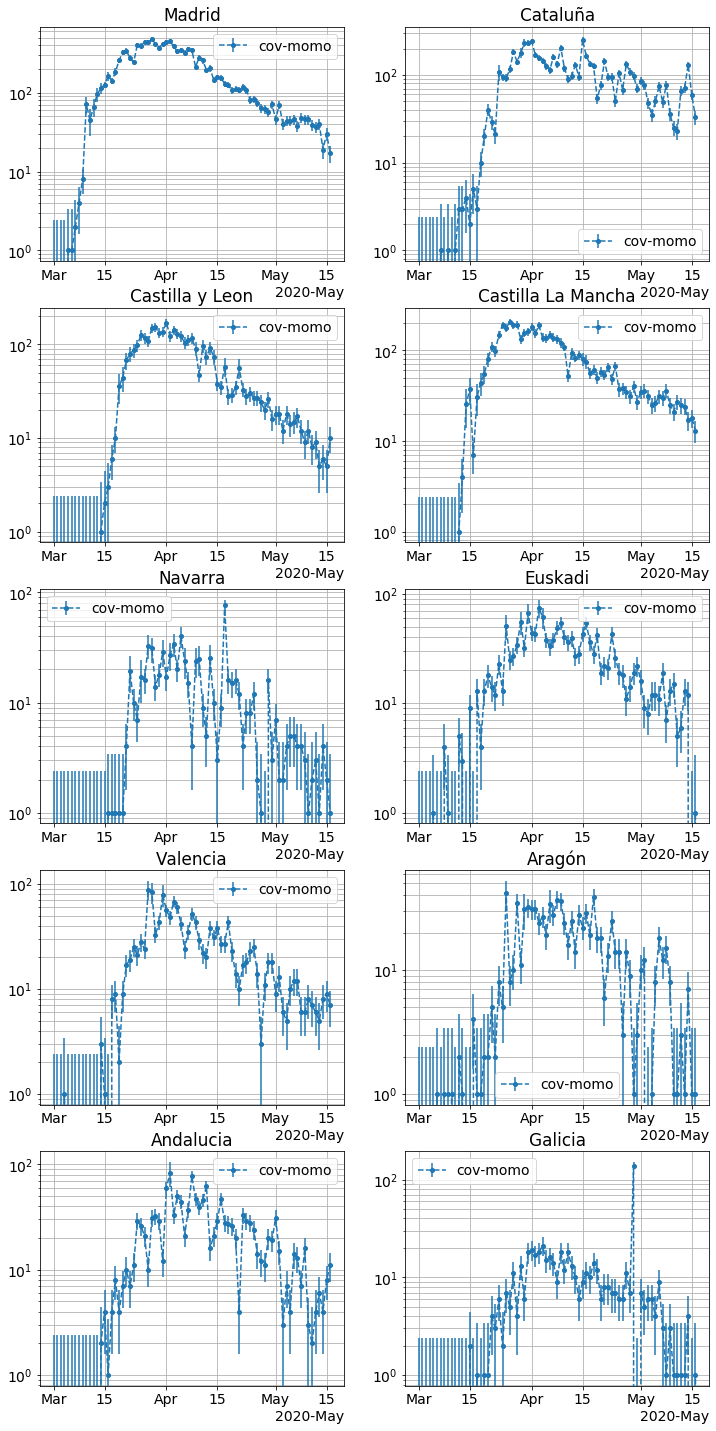

In [266]:
aus.plot_ca_comomos(dfsa, dfmo)

### KF-comomo

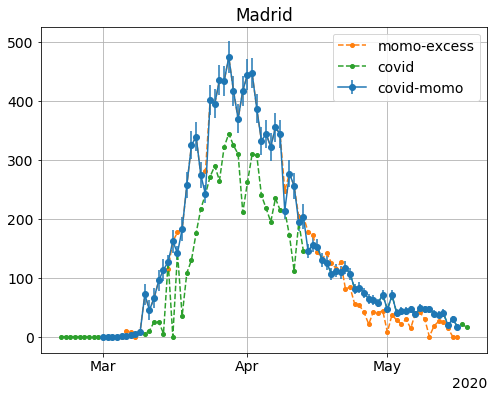

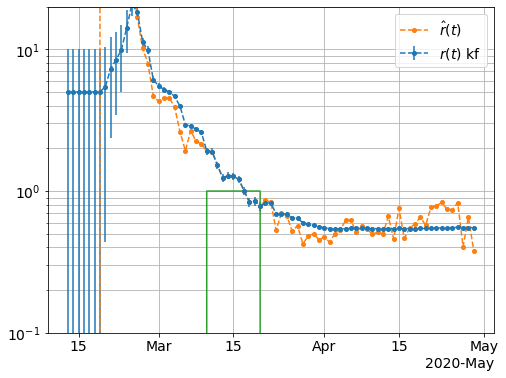

In [298]:
cc = aus.ca_kafi(dfsa, dfmo, 'Madrid', times, frho,
                 idates = ('2020-03-10', '2020-03-20'), plot = True)

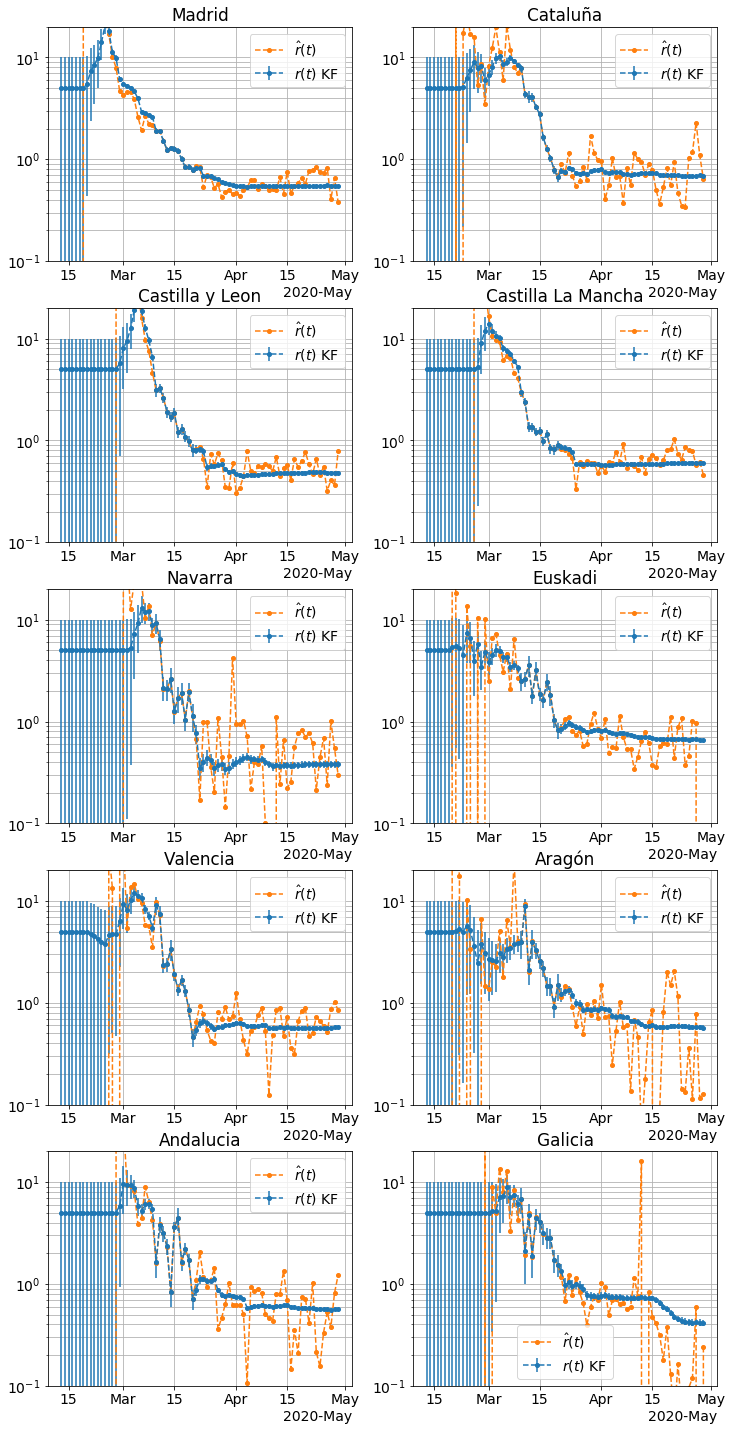

In [270]:
ti, tr, tm, td = 5, 10, 7, 5
frho           = us.fgamma
idates         = ('2020-03-10', '2020-03-20')
times          = (ti, tr, tm, td)
aus.plot_ca_rs(dfsa, dfmo, aus.ccaas.keys(), times = times, frho = frho, idates = idates)

### covid and comomo

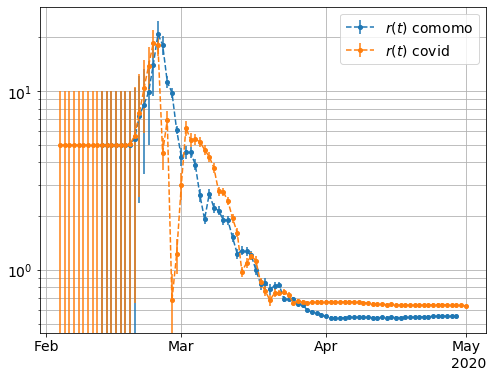

In [300]:
ti, tr, tm, td = 5, 10, 7, 5
frho           = us.fgamma
idates         = ('2020-03-01', '2020-03-20')
times          = (ti, tr, tm, td)
cc = aus.ca_kafi_compare(dfsa, dfmo, 'Madrid', plot = True,
                         times = times, frho = frho, idates = idates)

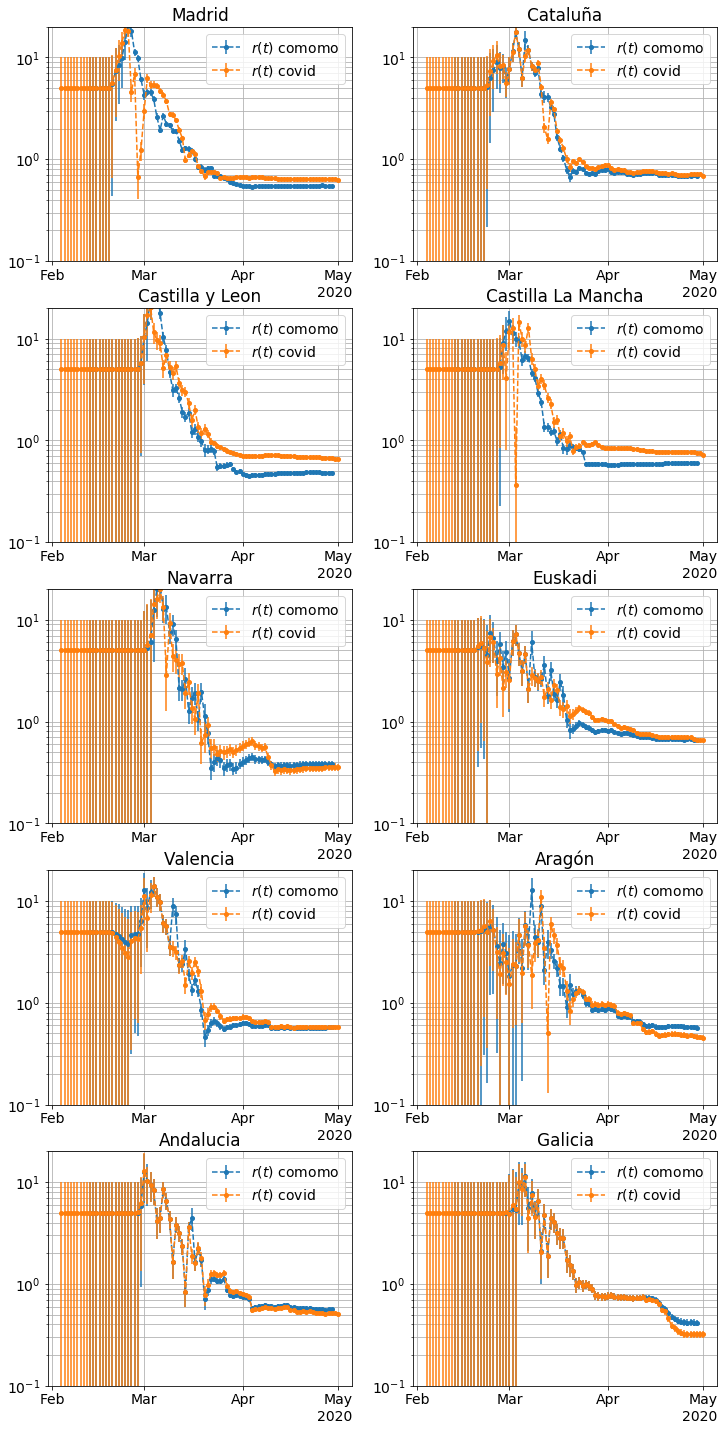

In [294]:
ti, tr, tm, td = 5, 10, 7, 5
frho           = us.fgamma
idates         = ('2020-03-01', '2020-03-20')
times          = (ti, tr, tm, td)
aus.plot_ca_rs_compare(dfsa, dfmo, aus.ccaas.keys(), 
                       times = times, frho = frho, idates = idates)

### Scan with respect the paramters and pdfs

In [ ]:
def scan_tds(xdios, ti, tds):
    plt.figure(figsize = (8, 6))
    for td in tds:
        betas = us.betas(xts, xdios, frho(td), frho(ti))
        xlabel = r'$T_d $'+str(td)
        plt.plot(dates - np.timedelta64(ti + td, 'D'), betas * td, ls = '--', marker = 'o', label = xlabel);
    xtitle = r'$R, \; T_i $' + str(ti)+' '+str(frho).split()[1]
    plt.title(xtitle); plt.grid(which = 'both'); plt.legend(); plt.yscale('log'); aus.formatter(plt.gca());
    
ti    = 5
tds   = (1, 3, 5, 7, 10)
scan_tds(xdios, ti, tds)

In [ ]:
def scan_tis(xdios, td, tis):
    plt.figure(figsize = (8, 6))
    for ti in tis:
        betas = us.betas(xts, xdios, frho(td), frho(ti))
        xlabel = r'$T_i $'+str(ti)
        plt.plot(dates - np.timedelta64(ti+td, 'D'), betas * td, ls = '--', marker = 'o', label = xlabel);
    xtitle = r'$R, \; T_d $' + str(td)+' '+str(frho).split()[1]
    plt.title(xtitle); plt.grid(which = 'both'); plt.legend(); plt.yscale('log'); aus.formatter(plt.gca());
    
td    = 5
tis   = (1, 3, 5, 7, 10)
scan_tis(xdios, td, tis)

In [ ]:
def scan_rhos(xdios, td, ti, rhos):
    plt.figure(figsize = (8, 6))
    for rho in rhos:
        betas = us.betas(xts, xdios, rho(td), rho(ti))
        xlabel = str(rho).split()[1]
        plt.plot(dates - np.timedelta64(ti + td, 'D'), betas * td, ls = '--', marker = 'o', label = xlabel);
    xtitle = r'$R_d, \; T_d $' + str(td)+'$, T_i$'+str(ti)
    plt.title(xtitle); plt.grid(which = 'both'); plt.legend(); plt.yscale('log'); aus.formatter(plt.gca());
    
td, ti    = 5, 5
rhos  = (us.ftheta, us.fpois, us.fexpon, us.funiform, us.ftriang)
scan_rhos(xdios, td, ti, rhos);

### Replace Proxy: death and detected

In [ ]:
ca              = 'AR'
ti, tr, tm, td  = 5, 7, 7, 5
phim            = 0.10 
times           = (ti, tr, tm, td)
frho            = us.fpois

dates, ns, ds   = aus.data_ca(df, ca)
#aus.plt_data_ca(dates, ns, ds, yscale = 'log');
kfres0, nisres0   = aus.ana_ca(dates, ns, ds, times, frho, phim)
kfres1, nisres1   = aus.ana_ca(dates, ns, ds, times, frho, 0.)

xdios1 = nisres[0]
xdios2 = nisres[1]

xts          = np.arange(len(dates))
xrhod, xrhoi = frho(td), frho(ti)

betas0 = us.betas(xts, xdios1, xrhod, xrhoi)
betas1 = us.betas(xts, xdios2, xrhod, xrhoi)

xdates = dates - np.timedelta64(ti + td, 'D')
plt.figure(figsize = (8, 6))
plt.plot(xdates, betas0 * td, ls = '--', marker = 'o', label = r'$\Delta I$ proxy: death')
plt.plot(xdates, betas1 * td, ls = '--', marker = 'o', label = r'$\Delta I$ proxy: detected')
plt.title(r'$R_\beta, \; T_i$'+str(ti)+r', $T_d$'+str(td)+', '+str(frho).split()[1])
plt.grid(which = 'both'); plt.legend(); plt.yscale('log'); aus.formatter(plt.gca());

## Compare between spanish regions

In [ ]:
cas = ['MA', 'CA', 'PV']
betas = []
for ca in cas:
    #print(ca)
    dates, ns, ds   = aus.data_ca(df, ca)
    #aus.plt_data_ca(dates, ns, ds, yscale = 'log');
    #kfres0, nisres0   = aus.ana_ca(dates, ns, ds, times, frho, phim)
    kfres, nisres   = aus.ana_ca(dates, ns, ds, times, frho, 0.)
    xdios = nisres[0]
    beta = us.betas(xts, xdios, xrhod, xrhoi)
    betas.append(beta)
xdates = dates - np.timedelta64(ti + td, 'D')

plt.figure(figsize = (10, 8))
for i in range(len(cas)):
    plt.plot(xdates, td * betas[i], ls = '--', marker = 'o', label = cas[i])
plt.title(r'$R$')
aus.formatter(plt.gca()); plt.grid(which = 'both'); plt.legend(); plt.yscale('log');

### Extrapolation

In [ ]:
N               = 1e6
R0, TI, TR, TM  = 3., 5., 5., 7.
PhiM            = 0.01
ndays           = 365
rho             = 'poisson'
frho            = us.frho(rho)

#S0
#D0 

ts = np.arange(ndays)
SS, DD          = us.uSEIR(N, R0, TI, TR, TM, PhiM, ndays, rho = rho, S0, D0)
S, E, I, R, M   = SS
DE, DI0, DR, DM = DD

title = r'$R_0$ :'+ str(R0)+ r'; $T_i, T_r, T_m$ : '+str((TI, TR, TM)) + r'; $\phi$ :'+str(PhiM)
us.plt_uSEIR(ts, SS, DD, title)

## FoM

**rw** rate in a week average with a time-ifection delay.

In [ ]:
def betaave(xdios, td, ti):
    nsize = len(xdios)
    nis = npa([np.sum(xdios[max(i - td - ti, 0) : i]) for i in range(nsize)])
    rs = xdios/np.maximum(1., nis)
    rs[nis <= 0] = 0
    return rs, nis

In [ ]:
xtd, xti    = 5, 5
knis        = nisres[1]
betav, xnis = betaave(xdios, xtd, xti)

plt.figure(figsize = (8, 6))
#xdates = dates -  np.timedelta64(xtd + xti + 7, 'D')
plt.plot(dates, betav * td, label = r'$R_a$'); 
plt.plot(dates, betas * td, label = r'$R_\beta$'); 
plt.grid(which = 'both'); plt.yscale('log'); plt.legend();
aus.formatter(plt.gca());

plt.figure(figsize = (8, 6))
plt.plot(dates - np.timedelta64(ti + td, 'D'), xnis); 
plt.plot(dates - np.timedelta64(ti + td, 'D'), knis); 
aus.formatter(plt.gca()); plt.grid(which='both');